# Gather

In [606]:
import pandas as pd
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import random

%matplotlib inline
random.seed(42)

In [380]:
# read in the twitter data from file on hand
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [9]:
# download the image predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1],'wb') as file:
    file.write(r.content)

In [10]:
# read in the image predictions data
image_preds = pd.read_csv('image-predictions.tsv',sep='\t')

In [16]:
# access the twitter api
with open('twitter_dev_keys.txt','r') as file:
    keys = file.readlines()
keys = [key.rstrip('\n') for key in keys]

consumer_key = keys[1]
consumer_secret = keys[3]
access_token = keys[7]
access_token_secret = keys[9]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
# download the tweets & write them
with open('tweet_json.txt','a') as file:
    for i in twitter_arch['tweet_id'].items():
# in case tweet has been deleted
        try:
            tweet = api.get_status(i[1], tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError:
            print('id {} not available'.format(i[1]))

Rate limit reached. Sleeping for: 6


id 888202515573088257 not available
id 873697596434513921 not available
id 872668790621863937 not available
id 872261713294495745 not available
id 869988702071779329 not available
id 866816280283807744 not available
id 861769973181624320 not available
id 856602993587888130 not available
id 851953902622658560 not available
id 845459076796616705 not available
id 844704788403113984 not available
id 842892208864923648 not available
id 837366284874571778 not available
id 837012587749474308 not available
id 829374341691346946 not available
id 827228250799742977 not available
id 812747805718642688 not available
id 802247111496568832 not available
id 779123168116150273 not available
id 775096608509886464 not available
id 771004394259247104 not available
id 770743923962707968 not available
id 759566828574212096 not available


Rate limit reached. Sleeping for: 666


id 754011816964026368 not available
id 680055455951884288 not available


Rate limit reached. Sleeping for: 671


In [54]:
# read json data into dataframe
# note here this is a solution from Stack Overflow; json.load(file) fails, apparently if have multiple objects
with open('tweet_json.txt') as jfile:
     jtweet = [json.loads(line) for line in jfile]
ext_tweet = pd.DataFrame.from_dict(jtweet)

In [55]:
# just keep the relevant columns
ext_tweet = ext_tweet[['id','id_str','retweet_count','favorite_count']]

# Assess

In [381]:
display(twitter_arch.head())
display(twitter_arch.tail())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [382]:
display(twitter_arch.sample(20))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remus. He's a mop that came to life. C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792050063...,11,10,Remus,None,None,None,None
1778,677895101218201600,NaN,NaN,2015-12-18 16:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this was terrifying. Really spooked me up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677895101...,9,10,None,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timmy. He's quite large. According to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344...,4,10,None,None,None,None,None
52,882045870035918850,NaN,NaN,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/882045870...,13,10,Koko,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
1802,676949632774234114,NaN,NaN,2015-12-16 02:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrus. He's a Speckled Centennial Tico...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676949632...,8,10,Tyrus,None,None,None,None
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882268110...,13,10,Alfy,None,None,None,None
511,811985624773361665,NaN,NaN,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,None,None,None,None


In [383]:
display(twitter_arch.info())
display(twitter_arch.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [384]:
display(twitter_arch['rating_numerator'].value_counts())
display(twitter_arch['rating_denominator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [385]:
display(twitter_arch[twitter_arch['rating_denominator'] != 10])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [386]:
display(twitter_arch['text'][313])

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [387]:
display(twitter_arch['text'][342])

'@docmisterio account started on 11/15/15'

In [388]:
display(twitter_arch['text'][433])

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [389]:
display(twitter_arch['text'][516])

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [390]:
display(twitter_arch['text'][902])

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [391]:
display(twitter_arch['text'][1068])

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [392]:
display(twitter_arch['text'][1120])

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [393]:
display(twitter_arch['text'][1165])

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [394]:
display(twitter_arch['text'][1202])

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [395]:
display(twitter_arch['text'][1228])

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [396]:
display(twitter_arch['text'][1254])

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [397]:
display(twitter_arch['text'][1274])

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [398]:
display(twitter_arch['text'][1351])

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [399]:
display(twitter_arch['text'][1433])

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [400]:
display(twitter_arch['text'][1598])

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

In [401]:
display(twitter_arch['text'][1634])

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [402]:
display(twitter_arch['text'][1635])

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [403]:
display(twitter_arch['text'][1662])

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [404]:
display(twitter_arch['text'][1663])

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [405]:
display(twitter_arch['text'][1779])

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [406]:
display(twitter_arch['text'][1843])

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [407]:
display(twitter_arch['text'][2335])

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [408]:
display(twitter_arch[(twitter_arch['rating_numerator'] > 20) & (twitter_arch['rating_denominator'] == 10)])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [409]:
display(twitter_arch['text'][188])

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [410]:
display(twitter_arch['text'][189])

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [411]:
display(twitter_arch['text'][290])

'@markhoppus 182/10'

In [412]:
display(twitter_arch['text'][340])

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [413]:
display(twitter_arch['text'][695])

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [414]:
display(twitter_arch['text'][763])

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [415]:
display(twitter_arch['text'][979])

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [416]:
display(twitter_arch['text'][1712])

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [417]:
display(twitter_arch['text'][2074])

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [418]:
display(twitter_arch['name'].value_counts()[0:59])

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Bailey        7
Buddy         7
Toby          7
Daisy         7
Oscar         6
Scout         6
Milo          6
Rusty         6
Stanley       6
Dave          6
Bella         6
Jack          6
Jax           6
Leo           6
Koda          6
Bentley       5
Sammy         5
Oakley        5
Gus           5
Alfie         5
Chester       5
very          5
Larry         5
Phil          5
Finn          5
Sunny         5
George        5
Louis         5
Loki          4
Dexter        4
Boomer        4
one           4
Beau          4
Maggie        4
Archie        4
Winnie        4
Jerry         4
Hank          4
just          4
Maddie        4
Clarence      4
Ruby          4
Riley         4
Maximus       4
Walter        4
Name: name, dtype: int64

In [419]:
display(twitter_arch['name'].value_counts()[60:119])

Jeffrey      4
Chip         4
Sophie       4
Scooter      4
Luna         4
Gary         4
Bruce        4
Derek        4
Gerald       4
Cassie       4
Brody        4
quite        4
Moose        4
Carl         4
Bear         4
Sampson      4
Reginald     4
Reggie       4
Shadow       4
Clark        4
Otis         3
Ted          3
Louie        3
Nala         3
Gizmo        3
Doug         3
Reese        3
Olive        3
Mia          3
Samson       3
Frankie      3
Zeke         3
Kyle         3
Steven       3
Klevin       3
Jimothy      3
Zoey         3
Coco         3
Paisley      3
Max          3
Rory         3
Wilson       3
Lily         3
Calvin       3
Waffles      3
Earl         3
Wallace      3
Vincent      3
Arnie        3
Rosie        3
Sebastian    3
Colby        3
Malcolm      3
Lorenzo      3
Peaches      3
Ellie        3
Wyatt        3
Kirby        2
Sam          2
Name: name, dtype: int64

In [420]:
# non-names appear to be lowercase.
not_names = twitter_arch['name'][twitter_arch['name'].str.match(r'^[a-z]')==True].value_counts()
display(not_names)

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
mad              2
getting          2
not              2
officially       1
such             1
infuriating      1
old              1
unacceptable     1
space            1
incredibly       1
this             1
my               1
by               1
light            1
his              1
all              1
life             1
Name: name, dtype: int64

In [421]:
# see if some of the names are discernible from text
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True])

22      I've yet to rate a Venezuelan Hover Wiener. Th...
56      Here is a pupper approaching maximum borkdrive...
118     RT @dog_rates: We only rate dogs. This is quit...
169     We only rate dogs. This is quite clearly a smo...
193     Guys, we only rate dogs. This is quite clearly...
                              ...                        
2349    This is an odd dog. Hard on the outside but lo...
2350    This is a truly beautiful English Wilson Staff...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
Name: text, Length: 109, dtype: object

In [422]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][22])

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

In [423]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][56])

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'

In [424]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][118])

"RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…"

In [425]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][2354])

'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI'

In [426]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][2353])

'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR'

In [427]:
display(twitter_arch['text'][twitter_arch['name'].str.match(r'^[a-z]')==True][2352])

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [428]:
# see if consistent tagging of non-dog entries
# see if some of the names are discernible from text
display(twitter_arch[twitter_arch['text'].str.match(r'.+[Ww]e only rate dogs.+')==True])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None


In [429]:
# most of those look like non-dogs
display(twitter_arch['text'][25])

'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp'

In [430]:
display(twitter_arch['doggo'].value_counts())
display(twitter_arch['floofer'].value_counts())
display(twitter_arch['pupper'].value_counts())
display(twitter_arch['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64

In [431]:
# these fields should be exclusive, but in tidying found some have multiple stage entries
twitter_arch[(twitter_arch['doggo'] != "None") & (twitter_arch['floofer']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [432]:
# this appears to be a non-dog
display(twitter_arch['text'][200])

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [433]:
twitter_arch[(twitter_arch['doggo'] != "None") & (twitter_arch['puppo']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [434]:
# this appears to be parsed incorrectly due to "doggo" also being part of the tweet
display(twitter_arch['text'][191])

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [435]:
# based on the texts of these, moost appear to be multiple or non-dog
twitter_arch[(twitter_arch['doggo'] != "None") & (twitter_arch['pupper']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [451]:
# look at individual entries for those not obvious from snippets above
display(twitter_arch['text'][460])

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [447]:
display(twitter_arch['text'][575])

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [448]:
display(twitter_arch['text'][705])

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [449]:
display(twitter_arch['text'][889])

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [450]:
display(twitter_arch['text'][1063])

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [439]:
twitter_arch[(twitter_arch['puppo'] != "None") & (twitter_arch['pupper']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [440]:
twitter_arch[(twitter_arch['floofer'] != "None") & (twitter_arch['pupper']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [441]:
twitter_arch[(twitter_arch['puppo'] != "None") & (twitter_arch['floofer']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [442]:
display(image_preds.head())
display(image_preds.tail())

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [106]:
display(image_preds.sample(20))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,689659372465688576,https://pbs.twimg.com/media/CZIpimOWcAETFRt.jpg,1,bustard,0.225221,False,koala,0.057625,False,goose,0.053569,False
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
1105,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False


In [27]:
display(image_preds.info())
display(image_preds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [58]:
display(image_preds['tweet_id'].nunique())

2075

In [105]:
display(image_preds['p1'].value_counts())

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Egyptian_cat            1
bib                     1
convertible             1
microphone              1
carton                  1
Name: p1, Length: 378, dtype: int64

In [107]:
display(ext_tweet.head())
display(ext_tweet.tail())

,id,id_str,retweet_count,favorite_count
0,892420643555336193,892420643555336193,7435,35269
1,892177421306343426,892177421306343426,5527,30523
2,891815181378084864,891815181378084864,3649,22951
3,891689557279858688,891689557279858688,7615,38554
4,891327558926688256,891327558926688256,8195,36840


,id,id_str,retweet_count,favorite_count
2326,666049248165822465,666049248165822465,39,95
2327,666044226329800704,666044226329800704,123,262
2328,666033412701032449,666033412701032449,39,108
2329,666029285002620928,666029285002620928,41,118
2330,666020888022790149,666020888022790149,445,2350


In [109]:
display(ext_tweet.info())
display(ext_tweet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   id_str          2331 non-null   object
 2   retweet_count   2331 non-null   int64 
 3   favorite_count  2331 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


None

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2611.618190,7367.585157
std,6.823170e+16,4418.732698,11441.964928
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,528.500000,1280.000000
50%,7.182469e+17,1220.000000,3198.000000
75%,7.986692e+17,3032.000000,9015.500000
max,8.924206e+17,75049.000000,151922.000000


# Clean

### Quality

`twitter_arch` contains retweets, which we want to exclude

##### Define
Delete retweet entries

##### Code

In [452]:
# back up data first
twitter_archbu = twitter_arch.copy()

In [453]:
twitter_archbu = twitter_archbu[twitter_archbu['retweeted_status_id'].isnull()]

##### Test

In [454]:
twitter_archbu['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [455]:
twitter_archbu.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833863086...,12,10,Bentley,None,None,None,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,None,None,pupper,None
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None


##### Code

In [456]:
# the retweeted columns are now empty, so delete them
twitter_archbu.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

##### Test

In [457]:
twitter_archbu.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [458]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` contains tweets about non-dog things, which we want to exclude

##### Define
Delete the non-dog entries. Since [@dograte's](https://twitter.com/dog_rates) replies to these consistently include "we only rate dogs", it is assumed any entry with this phrase in `text` is a non-dog entry.

##### Code

In [459]:
twitter_archbu = twitter_archbu[twitter_archbu['text'].str.match(r'.+[Ww]e only rate dogs.+')==False]

##### Test

In [460]:
display(twitter_archbu[twitter_archbu['text'].str.match(r'.+[Ww]e only rate dogs.+')==True])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [461]:
# looks good, so copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` contains ratings data that aren't ratings

##### Define
Replace the erroneous ratings with actual ratings from `text` or delete if no rating was found in `text`.

##### Code

In [462]:
# these are the entries that appear to be parsing errors and had correct-appearing ratings in the tweet
rating_fix = [{'index': 313, 'numerator':13},{'index':1068, 'numerator':14},{'index':1165, 'numerator':13},\
              {'index':1202, 'numerator':11},{'index':1662, 'numerator':10}, {'index':2335, 'numerator':9},\
              {'index':695, 'numerator':10},{'index':763, 'numerator':11}]
rate_fix = pd.DataFrame(rating_fix)
rate_fix.head()

,index,numerator
0,313,13
1,1068,14
2,1165,13
3,1202,11
4,1662,10


In [463]:
twitter_archbu = twitter_arch.copy()
for i in rate_fix['index']:
    twitter_archbu.loc[i,'rating_numerator'] = rate_fix.loc[(rate_fix['index']==i),'numerator'].values
    twitter_archbu.loc[i,'rating_denominator'] = 10

##### Test

In [464]:
display(twitter_archbu.loc[rate_fix['index']])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,Sophie,None,None,pupper,None


In [465]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

##### Code

In [466]:
# these did not have obvious ratings in the text, so delete the entries
rate_del = [342, 516, 1598, 1663, 1712]
twitter_archbu.drop(rate_del, inplace=True)

##### Test

In [467]:
try:
    display(twitter_archbu.loc[rate_del])
except KeyError:
    print('values not found')

values not found


In [468]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` contains ratings for multiple-dog groups

##### Define
Remove the multi-dog entries, which have denominators <> 10

##### Code

In [469]:
twitter_archbu = twitter_archbu[twitter_archbu['rating_denominator'] == 10]

##### Test

In [470]:
display(twitter_archbu[twitter_archbu['rating_denominator'] != 10])
display(twitter_archbu.head())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [471]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` contains non-name entries in `name`

##### Define
Remove the multi-dog entries, which have denominators <> 10

##### Code

In [472]:
no_names = twitter_archbu['name'][twitter_archbu['name'].str.match(r'^[a-z]')==True].index
twitter_archbu.loc[no_names,'name'] = 'None'

##### Test

In [473]:
display(twitter_archbu['name'][twitter_archbu['name'].str.match(r'^[a-z]')==True].value_counts())

Series([], Name: name, dtype: int64)

In [474]:
# check one of the entries to make sure it's set correctly
twitter_archbu.loc[56,'name']

'None'

In [475]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` fields `timestamp` and `retweeted_status_timestamp` are strings, not datetime

##### Define
Convert `timestamp` to datetime. `retweeted_status_timestamp` has been deleted.

##### Code

In [476]:
twitter_archbu['timestamp'] = pd.to_datetime(twitter_archbu['timestamp'])

##### Test

In [477]:
display(twitter_archbu.info())
display(twitter_archbu.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2121 non-null   int64              
 1   in_reply_to_status_id  73 non-null     float64            
 2   in_reply_to_user_id    73 non-null     float64            
 3   timestamp              2121 non-null   datetime64[ns, UTC]
 4   source                 2121 non-null   object             
 5   text                   2121 non-null   object             
 6   expanded_urls          2066 non-null   object             
 7   rating_numerator       2121 non-null   int64              
 8   rating_denominator     2121 non-null   int64              
 9   name                   2121 non-null   object             
 10  doggo                  2121 non-null   object             
 11  floofer                2121 non-null   object           

None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [478]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` fields `in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_id` and `retweeted_user_id` are floats, not ints

##### Define
Convert `in_reply_to_status_id` and `in_reply_to_user_id` to int. `retweeted_status_id` and `retweeted_user_id` have been deleted.

##### Code

In [479]:
# the pd.Int64DType() is to get around a error due to float NaNs
twitter_archbu['in_reply_to_status_id'] = twitter_archbu['in_reply_to_status_id'].astype(pd.Int64Dtype())
twitter_archbu['in_reply_to_user_id'] = twitter_archbu['in_reply_to_user_id'].astype(pd.Int64Dtype())

##### Test

In [480]:
display(twitter_archbu.info())
display(twitter_archbu.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2121 non-null   int64              
 1   in_reply_to_status_id  73 non-null     Int64              
 2   in_reply_to_user_id    73 non-null     Int64              
 3   timestamp              2121 non-null   datetime64[ns, UTC]
 4   source                 2121 non-null   object             
 5   text                   2121 non-null   object             
 6   expanded_urls          2066 non-null   object             
 7   rating_numerator       2121 non-null   int64              
 8   rating_denominator     2121 non-null   int64              
 9   name                   2121 non-null   object             
 10  doggo                  2121 non-null   object             
 11  floofer                2121 non-null   object           

None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [481]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`twitter_arch` dog-stage fields `floofer`,`pupper`, `puppo` and `doggo` should be mutually exclusive, but some entries have more than one stage

##### Define
Delete the entries that appear to be non-dog or multi-dog. Correct the ones that appear to be parsed incorrectly.

##### Code

In [482]:
# These two are parsed incorrectly. Set doggo field to none
twitter_archbu.loc[191,'doggo'] = "None"
twitter_archbu.loc[460,'doggo'] = "None"

In [484]:
# remove the other entries as are multi-dog or non-dog
twitter_archbu = twitter_archbu[~((twitter_archbu['doggo'] != "None") & (twitter_archbu['floofer']!="None"))]

In [485]:
twitter_archbu = twitter_archbu[~((twitter_archbu['doggo'] != "None") & (twitter_archbu['pupper']!="None"))]

##### Test

In [486]:
twitter_archbu[(twitter_archbu['doggo'] != "None") & (twitter_archbu['floofer']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [487]:
twitter_archbu[(twitter_archbu['doggo'] != "None") & (twitter_archbu['pupper']!="None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [489]:
# looks good, copy back
twitter_arch = twitter_archbu.copy()

`image_preds` fields `p1`, `p2`, and `p3` are inconsistently capitalized

##### Define
Make all entries in `p1`, `p2`, and `p3` lowercase for consistency.

##### Code

In [270]:
image_predsbu = image_preds.copy()

In [271]:
image_predsbu['p1'] = image_predsbu['p1'].str.lower()

In [272]:
image_predsbu['p2'] = image_predsbu['p2'].str.lower()

In [273]:
image_predsbu['p3'] = image_predsbu['p3'].str.lower()

##### Test

In [275]:
image_predsbu.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,boston_bull,0.004794,True,french_bulldog,0.004573,True
1772,827933404142436356,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2,german_shepherd,0.806115,True,tibetan_mastiff,0.104831,True,kelpie,0.038148,True
1605,800443802682937345,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,norfolk_terrier,0.129114,True,pomeranian,0.120822,True
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,eskimo_dog,0.232641,True,pembroke,0.091602,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,pomeranian,0.076922,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,lakeland_terrier,0.073316,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,irish_setter,0.077456,True
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,True,kelpie,0.227402,True,vizsla,0.103246,True


In [276]:
# looks good, copy back
image_preds = image_predsbu.copy()

`image_preds` contains fewer entries than the twitter archive.

##### Define
This means some tweets have no images. This will be addressed in "Tidiness" when the tables are joined.

`ext_tweet` contains fewer entries than the twitter archive.

##### Define
This means some tweets were deleted or are otherwise not accessible. This will be addressed in "Tidiness" when the tables are joined.

### Tidiness

`twitter_arch` fields `doggo`, `floofer`, `pupper` and `puppo` are mutually exclusive descriptions of dog stage

##### Define
Make a single categorical field `stage` containing each stage name or "none".

##### Code

In [490]:
twitter_archmelt = pd.melt(twitter_archbu, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id',\
                                                   'timestamp','source','expanded_urls','rating_numerator',\
                                                   'rating_denominator','name'],value_vars=['doggo','floofer',\
                                                    'pupper','puppo'])

In [492]:
# first get rid of all the duplicate "None" entries
twitter_archmelt.drop_duplicates(subset=['tweet_id','value'],inplace=True)

In [493]:
twitter_archmelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 0 to 7208
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2445 non-null   int64              
 1   in_reply_to_status_id  79 non-null     Int64              
 2   in_reply_to_user_id    79 non-null     Int64              
 3   timestamp              2445 non-null   datetime64[ns, UTC]
 4   source                 2445 non-null   object             
 5   expanded_urls          2384 non-null   object             
 6   rating_numerator       2445 non-null   int64              
 7   rating_denominator     2445 non-null   int64              
 8   name                   2445 non-null   object             
 9   variable               2445 non-null   object             
 10  value                  2445 non-null   object             
dtypes: Int64(2), datetime64[ns, UTC](1), int64(3), object(5)

In [494]:
twitter_archmelt['value'].value_counts()

None       2111
pupper      225
doggo        75
puppo        25
floofer       9
Name: value, dtype: int64

In [496]:
twitter_archmelt['drop'] = twitter_archmelt.duplicated(subset=['tweet_id'], keep=False)

In [497]:
twitter_archmelt['drop'].value_counts()

False    1777
True      668
Name: drop, dtype: int64

In [498]:
# find the "None" entries that are duplicates of those with a stage entry
drop_rows = twitter_archmelt[(twitter_archmelt['drop']==True) & (twitter_archmelt['value']=="None")].index
len(drop_rows)

334

In [499]:
# drop those rows
twitter_archmelt.drop(drop_rows,inplace=True)

In [504]:
# clean up the columns & names
twitter_archmelt.drop(columns=['variable','drop'], inplace=True)

In [506]:
twitter_archmelt.rename(columns={'value':'stage'}, inplace=True)

In [526]:
twitter_archmelt['stage'] = twitter_archmelt['stage'].astype('category')

##### Test

In [528]:
twitter_archmelt['stage'].value_counts()

None       1777
pupper      225
doggo        75
puppo        25
floofer       9
Name: stage, dtype: int64

In [529]:
twitter_archmelt.duplicated(subset=['tweet_id'],keep=False).sum()

0

In [531]:
display(twitter_archmelt.head())
display(twitter_archmelt.info())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 7208
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2111 non-null   int64              
 1   in_reply_to_status_id  72 non-null     Int64              
 2   in_reply_to_user_id    72 non-null     Int64              
 3   timestamp              2111 non-null   datetime64[ns, UTC]
 4   source                 2111 non-null   object             
 5   expanded_urls          2056 non-null   object             
 6   rating_numerator       2111 non-null   int64              
 7   rating_denominator     2111 non-null   int64              
 8   name                   2111 non-null   object             
 9   stage                  2111 non-null   category           
dtypes: Int64(2), category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 171.3+ KB


None

In [532]:
#looks good, copy back
twitter_archbu = twitter_archmelt.copy()
twitter_arch = twitter_archmelt.copy()

`image_preds`should be combined with the main archive table since there is one entry per tweet

##### Define
Merge `image_preds` with `twitter_arch`. Inner join so non-image-containing tweets are eliminated.

##### Code

In [533]:
twitter_archbu = twitter_archbu.merge(image_predsbu,on='tweet_id')

##### Test

In [534]:
display(twitter_archbu.head())
display(twitter_archbu.info())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 1933
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1934 non-null   int64              
 1   in_reply_to_status_id  20 non-null     Int64              
 2   in_reply_to_user_id    20 non-null     Int64              
 3   timestamp              1934 non-null   datetime64[ns, UTC]
 4   source                 1934 non-null   object             
 5   expanded_urls          1934 non-null   object             
 6   rating_numerator       1934 non-null   int64              
 7   rating_denominator     1934 non-null   int64              
 8   name                   1934 non-null   object             
 9   stage                  1934 non-null   category           
 10  jpg_url                1934 non-null   object             
 11  img_num                1934 non-null   int64            

None

In [535]:
#looks good, copy back
twitter_arch = twitter_archbu.copy()

`ext_tweets`should be combined with the main archive table since it has additional data about each tweet

##### Define
Merge `ext_tweet` with `twitter_arch`. Inner join so no-longer-accessible tweets are eliminated.

##### Code

In [536]:
twitter_archbu = twitter_archbu.merge(ext_tweet,left_on='tweet_id',right_on='id')

In [537]:
# drop extra columns
twitter_archbu.drop(columns=['id','id_str'], inplace=True)

##### Test

In [538]:
display(twitter_archbu.head())
display(twitter_archbu.info())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7435,35269
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5527,30523
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3649,22951
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7615,38554
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,8195,36840


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1928 non-null   int64              
 1   in_reply_to_status_id  20 non-null     Int64              
 2   in_reply_to_user_id    20 non-null     Int64              
 3   timestamp              1928 non-null   datetime64[ns, UTC]
 4   source                 1928 non-null   object             
 5   expanded_urls          1928 non-null   object             
 6   rating_numerator       1928 non-null   int64              
 7   rating_denominator     1928 non-null   int64              
 8   name                   1928 non-null   object             
 9   stage                  1928 non-null   category           
 10  jpg_url                1928 non-null   object             
 11  img_num                1928 non-null   int64            

None

In [539]:
#looks good, copy back
twitter_arch = twitter_archbu.copy()

In [540]:
# store the cleaned data
twitter_arch.to_csv('twitter_archive_master.csv')

# Analyze

Are dogs with higher ratings more frequently favorited and retweeted?

In [541]:
twitter_arch['rating_numerator'].describe()

count    1928.000000
mean       11.677905
std        41.327461
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [542]:
twitter_arch['retweet_count'].describe()

count     1928.000000
mean      2355.490664
std       4262.250471
min         11.000000
25%        514.000000
50%       1122.500000
75%       2667.750000
max      75049.000000
Name: retweet_count, dtype: float64

In [543]:
twitter_arch['favorite_count'].describe()

count      1928.000000
mean       7995.210581
std       11903.628478
min          69.000000
25%        1657.000000
50%        3566.000000
75%        9981.500000
max      151922.000000
Name: favorite_count, dtype: float64

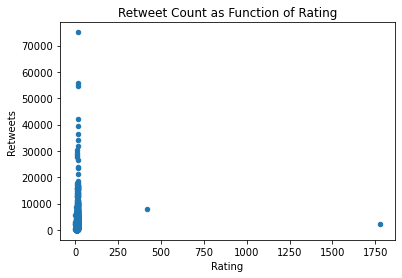

In [549]:
twitter_arch.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.xlabel('Rating')
plt.ylabel('Retweets')
plt.title('Retweet Count as Function of Rating');

In [550]:
# remove the 2 outliers
rate_nooutl = twitter_arch[twitter_arch['rating_numerator']< 250]

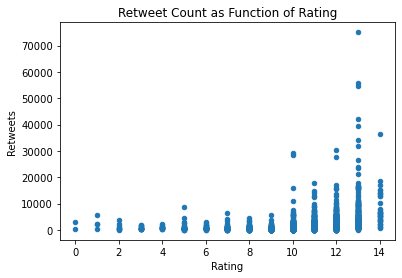

In [551]:
rate_nooutl.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.xlabel('Rating')
plt.ylabel('Retweets')
plt.title('Retweet Count as Function of Rating');

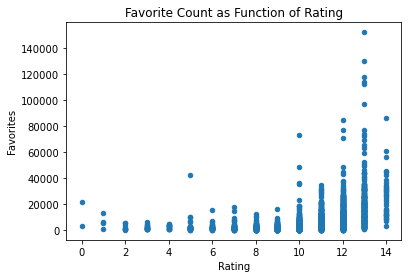

In [552]:
rate_nooutl.plot(x='rating_numerator', y='favorite_count', kind='scatter')
plt.xlabel('Rating')
plt.ylabel('Favorites')
plt.title('Favorite Count as Function of Rating');

In [561]:
# split ratings into < 10 vs >= 10
rate_nooutl['rate_hilo'] = rate_nooutl.apply(lambda row: row['rating_numerator']>=10, axis=1)

<ipython-input-561-56eb751d46ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_nooutl['rate_hilo'] = rate_nooutl.apply(lambda row: row['rating_numerator']>=10, axis=1)


In [563]:
rate_nooutl.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rate_hilo
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,7435,35269,True
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,True,pekinese,0.090647,True,papillon,0.068957,True,5527,30523,True
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,3649,22951,True
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7615,38554,True
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,8195,36840,True


In [565]:
rate_avg = rate_nooutl.groupby(['rate_hilo'], as_index=False)[['favorite_count','retweet_count']].mean()

In [566]:
rate_avg.head()

,rate_hilo,favorite_count,retweet_count
0,False,2404.686717,817.473684
1,True,9448.073346,2753.629339


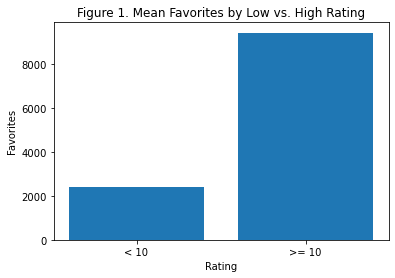

In [641]:
ind = pd.array([1.0, 2.0])
plt.bar(ind, rate_avg['favorite_count'])
plt.xticks(ind, ['< 10', '>= 10'])
plt.xlabel('Rating')
plt.ylabel('Favorites')
plt.title('Figure 1. Mean Favorites by Low vs. High Rating');

Higher-rated dogs appear to be favorited more frequently.

Check if this is statistically significant:

In [609]:
obs_diff_favs = rate_avg.loc[1,'favorite_count'] - rate_avg.loc[0,'favorite_count']
obs_diff_favs

7043.386629638931

In [611]:
# create sampling distribution of difference in favorites
# with boostrapping
diffs = np.empty(10000, dtype=float)
size = rate_nooutl.shape[0]
for x in range(10000):
    smplx = rate_nooutl.sample(size,replace=True)
    lo_mn = smplx.query('rate_hilo == False').favorite_count.mean()
    hi_mn = smplx.query('rate_hilo == True').favorite_count.mean()
    diffs[x] = hi_mn - lo_mn

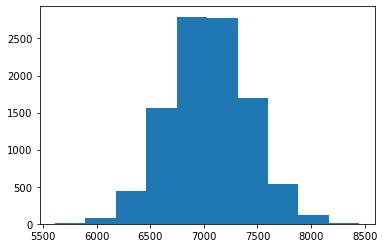

In [614]:
plt.hist(diffs);

In [615]:
np.std(diffs)

365.77567690730615

In [612]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

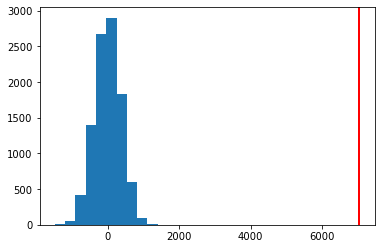

In [613]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff_favs,color='red',lw=2);

In [617]:
# compute p value
pval = (null_vals > obs_diff_favs).mean()
pval

0.0

The difference is highly significant.

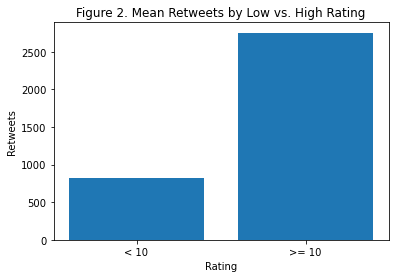

In [642]:
ind = pd.array([1.0, 2.0])
plt.bar(ind, rate_avg['retweet_count'])
plt.xticks(ind, ['< 10', '>= 10'])
plt.xlabel('Rating')
plt.ylabel('Retweets')
plt.title('Figure 2. Mean Retweets by Low vs. High Rating');

Higher-rated dogs appear to be retweeted more frequently.

Check if this is statistically significant:

In [618]:
obs_diff_rts = rate_avg.loc[1,'retweet_count'] - rate_avg.loc[0,'retweet_count']
obs_diff_rts

1936.155654361838

In [619]:
# create sampling distribution of difference in favorites
# with boostrapping
diffs = np.empty(10000, dtype=float)
size = rate_nooutl.shape[0]
for x in range(10000):
    smplx = rate_nooutl.sample(size,replace=True)
    lo_mn = smplx.query('rate_hilo == False').retweet_count.mean()
    hi_mn = smplx.query('rate_hilo == True').retweet_count.mean()
    diffs[x] = hi_mn - lo_mn

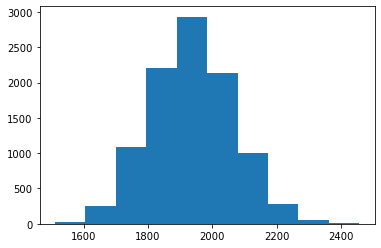

In [620]:
plt.hist(diffs);

In [621]:
np.std(diffs)

128.06539514299115

In [622]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

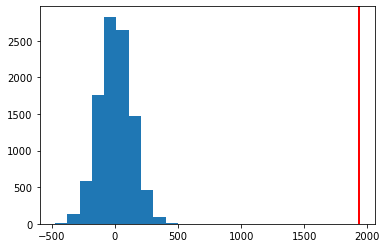

In [623]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff_rts,color='red',lw=2);

In [624]:
# compute p value
pval = (null_vals > obs_diff_favs).mean()
pval

0.0

Again, the difference is highly significant

Do dog ratings differ by stage?

In [570]:
rate_stg = rate_nooutl.groupby(['stage'], as_index=False)[['rating_numerator']].mean()

In [571]:
rate_stg

,stage,rating_numerator
0,None,10.460123
1,doggo,11.870968
2,floofer,12.000000
3,pupper,10.647059
4,puppo,12.043478


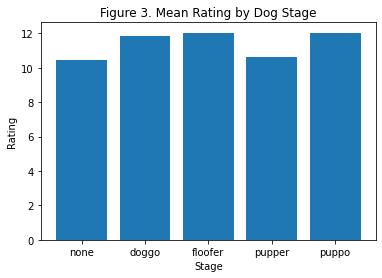

In [643]:
ind2 = pd.array([1.0, 2.0, 3.0, 4.0, 5.0])
plt.bar(ind2, rate_stg['rating_numerator'])
plt.xticks(ind2, ['none','doggo','floofer','pupper','puppo'])
plt.xlabel('Stage')
plt.ylabel('Rating')
plt.title('Figure 3. Mean Rating by Dog Stage');

Dog ratings do seem to vary slightly by stage. Dogs staged as `doggo`, `floofer`, and `puppo` may have slighltly higher ratings than dogs with no stage or dogs staged as `pupper`.

To see if there are significant differences, perform a linear regression on ratings as function of stage:

In [631]:
# mucked up dummy cols, restart
rate_nooutl.drop(columns=['doggo','floofer','none','pupper','puppo','None'],inplace=True)
display(rate_nooutl.head())
# make dummy variables
rate_nooutl[['None','doggo','floofer','pupper','puppo']]=pd.get_dummies(rate_nooutl['stage'])

/home/umahp/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rate_hilo
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,7435,35269,True
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,True,pekinese,0.090647,True,papillon,0.068957,True,5527,30523,True
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,3649,22951,True
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7615,38554,True
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,8195,36840,True


/home/umahp/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [632]:
rate_nooutl.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p3_conf,p3_dog,retweet_count,favorite_count,rate_hilo,None,doggo,floofer,pupper,puppo
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.076110,False,7435,35269,True,1,0,0,0,0
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.068957,True,5527,30523,True,1,0,0,0,0
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.031379,True,3649,22951,True,1,0,0,0,0
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.040836,False,7615,38554,True,1,0,0,0,0
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.175219,True,8195,36840,True,1,0,0,0,0


In [633]:
# perform linear regression on ratings as fxn of stage
rate_nooutl['intercept'] = 1
mdl_stg = sm.OLS(rate_nooutl['rating_numerator'],rate_nooutl[['intercept','doggo','floofer','pupper','puppo']])
stg_res = mdl_stg.fit()
stg_res.summary()

<ipython-input-633-af1e145d6e5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_nooutl['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           4.67e-08
Time:                        17:47:33   Log-Likelihood:                -4221.6
No. Observations:                1926   AIC:                             8453.
Df Residuals:                    1921   BIC:                             8481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.4601      0.054    194.703      0.000      10.355      10.565
doggo          1.4108      0.281      5.027      0.000       0.860       1.961
floofer        1.5399      0.822      1.874      0.061      -0.071       3.151
pupper         0.1869      0.161      1.160      0.246      -0.129       0.503
puppo          1.5834      0.455      3.476      0.001       0.690       2.477
==============================================================================
Omnibus:                      532.079   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.047
Skew:                          -1.461   Prob(JB):                    3.54e-305
Kurtosis:                       5.989   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression does show some significant differences, although the R-squared value is low (0.02), indicating the model does not explain much of the variation in ratings.

Compared to dogs with no stage classification, those classified as `doggo` and `puppo` have significantly higher ratings. 

The confidence interval for `pupper` does not overlap with those of `doggo` or `puppo`, indicating that pupper have significantly lower ratings (based on the coefficients) than doggos and puppos.

The confidence intervals for `doggo`, `floofer`, and `puppo` all overlap, indicating no significant difference between these groups. This is also true for `floofer` and `pupper`.

What are dogs most frequently mis-classified as by the neural network?

In [635]:
top10_miscl = rate_nooutl[rate_nooutl['p1_dog']==False]['p1'].value_counts()[0:10]
top10_miscl

seat_belt      21
teddy          17
web_site       15
dingo           9
tennis_ball     8
bath_towel      7
hamster         7
doormat         7
siamese_cat     7
swing           7
Name: p1, dtype: int64

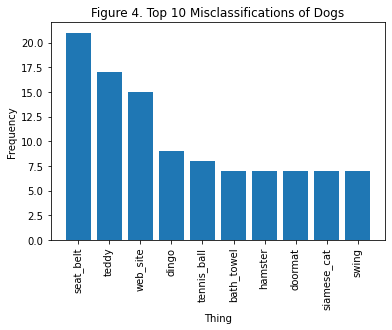

In [644]:
ind3 = range(1,11)
plt.bar(ind3,top10_miscl)
plt.xticks(ind3, top10_miscl.index, rotation='vertical')
plt.xlabel('Thing')
plt.ylabel('Frequency')
plt.title('Figure 4. Top 10 Misclassifications of Dogs');

Dogs are most frequently mis-classified as seat belts (?). Possibly due to presence of collar or leash.

Other furry (teddy, hamster) and very dog-like (dingo) animals are also common.

Does the neural network's confidence in its classification of the dogs as dogs correlate with dog rating?

In [637]:
corr_class = rate_nooutl[rate_nooutl['p1_dog']==True]

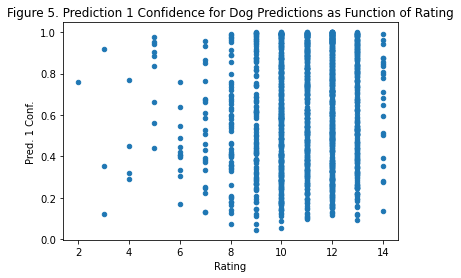

In [645]:
corr_class.plot(x='rating_numerator', y='p1_conf', kind='scatter')
plt.xlabel('Rating')
plt.ylabel('Pred. 1 Conf.')
plt.title('Figure 5. Prediction 1 Confidence for Dog Predictions as Function of Rating');

There doesn't seem to be an obvious relationship between rating and the neural network's confidence in its first prediction when it predicts that the picture is a dog, although there may be more predictions near a confidence of 1.0 at higher ratings.

Check this with linear regression:

In [640]:
mdl_ccl = sm.OLS(corr_class['p1_conf'],corr_class[['intercept','rating_numerator']])
ccl_res = mdl_ccl.fit()
ccl_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p1_conf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     14.21
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           0.000170
Time:                        18:09:08   Log-Likelihood:                -100.41
No. Observations:                1419   AIC:                             204.8
Df Residuals:                    1417   BIC:                             215.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.4441      0.045      9.866      0.000       0.356       0.532
rating_numerator     0.0153      0.004      3.770      0.000       0.007       0.023
==============================================================================
Omnibus:                      954.814   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.251
Skew:                          -0.124   Prob(JB):                     1.87e-19
Kurtosis:                       1.818   Cond. No.                         72.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression does a significant increase in prediction confidence with rating, although the R-squared value is low (0.01), indicating the model does not explain much of the variation in ratings.